# Minimale Belichtungszeit der Shutter am Zeiss Libra 200FE

Zu jedem Shutter wurde eine Messreihe aufgenommen, bei der die mittlere Intensität in Abhängigkeit von der Belichtungszeit gemessen wird. Die Kamera wurde gleichmäig ausgeleuchtet. Keine Probe wurde verwendet.

Für 7 der 8 Shutter konnte eine Messreihe aufgenommen werden. Der Shutter **Objective** funktioniert nicht, weshalb es dazu keine Messreihe gibt.

## Ergebnisse der Messung

Die **elektronischen Shutter** lassen sich ab einer Belichtungszeit von **0,01s** zuverlässig verwenden (linearer Anstieg der Intensität). Minimal lässt sich 0,004s verwenden, wobei es dann zu schwankungen kommt, wie die folgenden Diagramme zeigen.

Der **mechanische Shutter** bietet ab etwa **0,1s** ein lineares Verhalten. Bis hinunter zu 0,055s sinkt die Intensität mit kürzerer Belichtungszeit, wobei der Verlauf nicht mehr linear ist.

### Anmerkung zum mechanischen Shutter

Die Belichtungszeit des mechanischen Shutters ist kürzer, als die der elektronischen Shutter. Dies lässt sich daran erkennen, dass die mittlere Intensität bei identischer Belichtungszeit geringer ausfällt.

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

import os
import_dir = 'data/shutter'

shutters = {}
for file in os.listdir(import_dir):
    df = pd.read_csv(os.path.join(import_dir, file), sep='\t')
    df.columns = ['exposure', file.split('.')[0]]
    shutters[file] = df.set_index('exposure')
df = pd.concat(shutters.values(), axis=1)
df.sort_index()
df.head()

,Mechanical,Filter_Entrance,C1,Gun,C2,Filter_Exit,Pre-Field
exposure,,,,,,,
0.001,NaN,177.404,158.737,76.776,148.469,170.777,78.497
0.002,NaN,177.811,158.733,77.121,147.708,170.675,78.642
0.003,NaN,177.772,158.804,77.206,147.455,170.700,78.654
0.004,NaN,189.723,171.010,89.526,159.492,182.217,90.861
0.005,NaN,231.877,327.756,131.364,201.000,223.936,247.886


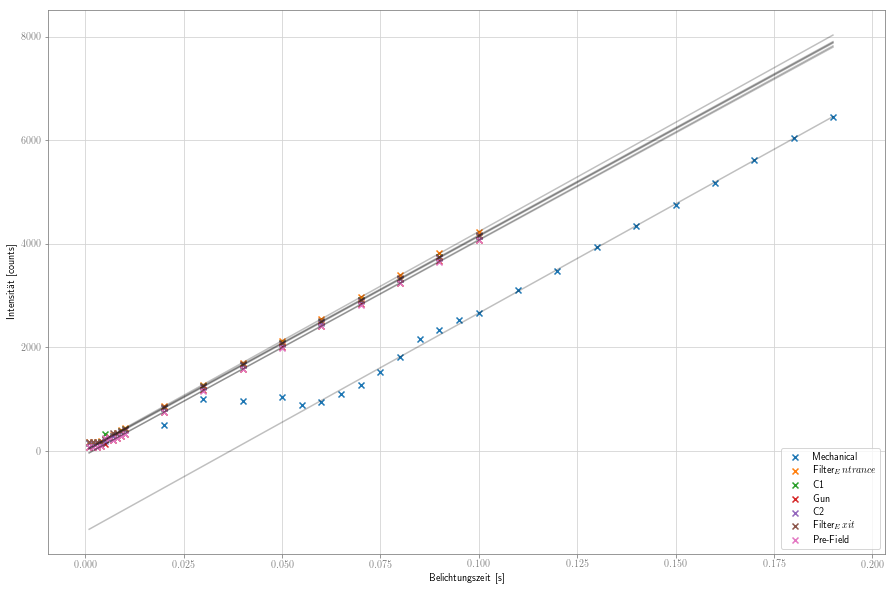

In [2]:
lin = lambda x, m, b: m * x + b

def optimal_fit(col):
    """Diese Funktion wählt den Fit aus, der die kleinste Varianz für die Steigung besitzt.
    Der variable Parameter ist die minimale Belichtungszeit.
    Da aufsteigend nach der Belichtungszeit sortiert ist, kann einfach der Start-Index erhöht werden.
    """
    results = []
    for offset in range(len(col) - 5):
        popt, var = scipy.optimize.curve_fit(lin, col.index[offset:], col.tolist()[offset:])
        results.append((var, popt))
    get_var_m = lambda x: x[0][0][0]
    var_m = [get_var_m(val) for val in results]
    var_min = np.min(var_m)    
    return results[var_m.index(var_min)][1]


def plot_fit(params):
    """Eine lineare Funktion mit den Übergebenen Parametern wird geplottet.
    """
    xs = np.linspace(df.index.min(), df.index.max(), 100)
    ys = lin(xs, *params)
    plt.plot(xs, ys, c='k', alpha=0.25)

    
def create_plot():
    """Erstellt für jede Spalte einen Scatter-Plot mit optimalen linearen Fit."""
    plt.figure(figsize=(15,10))
    for col in df.columns:
        plt.scatter(df.index, df[col], marker='x')
        plot_fit(optimal_fit(df[col].dropna()))
    plt.xlabel('Belichtungszeit [s]')
    plt.ylabel('Intensität [counts]')
    plt.legend(loc='lower right')


create_plot()
plt.show()

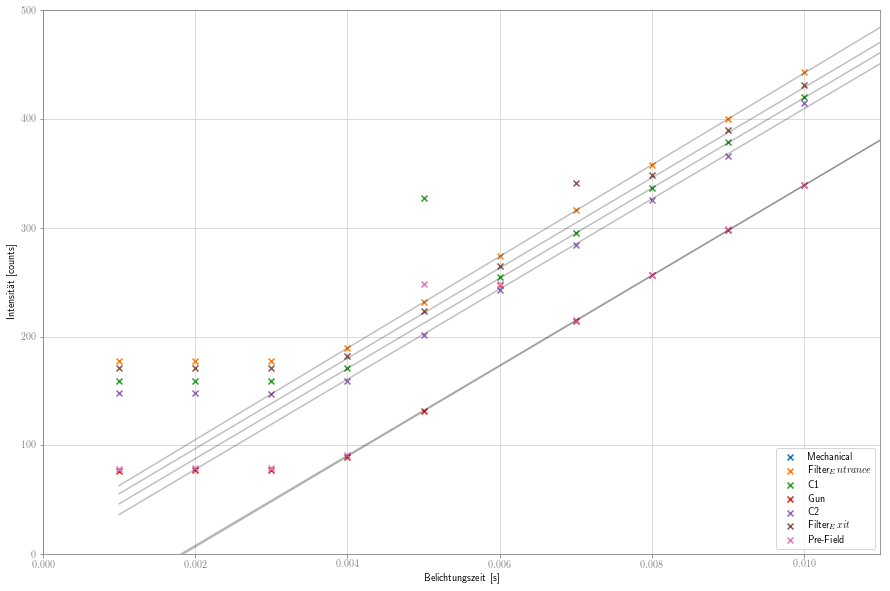

In [3]:
create_plot()
plt.xlim(0,0.011)
plt.ylim(0, 500)
plt.show()